# Dự đoán thiệt hại về kinh tế (dola) do thảm họa gây ra

# xem nhanh qua data

In [2]:
import pandas as pd

df = pd.read_csv("global_disaster_response_2018_2024.csv")
df.head()

,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
0,31/1/2021,Brazil,Earthquake,5.99,111,7934365.71,15.62,271603.79,83.21,67,-30.613,-122.557
1,23/12/2018,Brazil,Extreme Heat,6.53,100,8307648.99,5.03,265873.81,96.18,55,10.859,-159.194
2,10/8/2020,India,Hurricane,1.55,22,765136.99,32.54,49356.49,60.40,22,0.643,-160.978
3,15/9/2022,Indonesia,Extreme Heat,4.55,94,1308251.31,7.83,237512.88,86.41,47,-33.547,30.350
4,28/9/2022,United States,Wildfire,3.80,64,2655864.36,21.90,188910.69,72.81,42,-19.170,-117.137


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       50000 non-null  object 
 1   country                    50000 non-null  object 
 2   disaster_type              50000 non-null  object 
 3   severity_index             50000 non-null  float64
 4   casualties                 50000 non-null  int64  
 5   economic_loss_usd          50000 non-null  float64
 6   response_time_hours        50000 non-null  float64
 7   aid_amount_usd             50000 non-null  float64
 8   response_efficiency_score  50000 non-null  float64
 9   recovery_days              50000 non-null  int64  
 10  latitude                   50000 non-null  float64
 11  longitude                  50000 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 4.6+ MB


In [4]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,5.02,100.59,5068593.45,12.18,250000.33,87.57,49.68,0.23,0.09
std,1.94,65.05,3268540.52,9.26,143227.51,10.19,20.10,34.76,98.38
min,1.00,0.00,527.39,1.00,16.60,29.75,2.00,-59.99,-170.00
25%,3.66,51.00,2585513.48,6.27,142966.34,83.06,36.00,-29.85,-85.55
50%,4.99,91.00,4548350.74,10.51,230536.47,89.18,49.00,0.27,0.39
75%,6.34,138.00,6950614.61,15.45,335225.93,94.70,63.00,30.49,85.67
max,10.00,524.00,24456237.87,63.10,1126465.23,100.00,112.00,60.00,170.00


 - 0   country                    Quốc gia
 - 1   disaster_type              Loại thảm họa
 - 2   severity_index             mức độ thảm họa
 - 3   casualties                 người bị ảnh hưởng
 - 4   response_time_hours        thời gian phản ứng
 - 5   aid_amount_usd             tổng viện trợ quốc tế
 - 6   response_efficiency_score  điểm hiệu quả phản ứng
 - 7   recovery_days              ngày hồi phục
 - 8   latitude                   vĩ độ
 - 9   longitude                  kinh độ
 - 10  economic_loss_usd          thiệt hại kinh tế

In [5]:
# kiểm tra lặp
df.duplicated().sum()

np.int64(0)

In [6]:
# kiểm tra thiếu
df.isnull().sum()

,0
date,0
country,0
disaster_type,0
severity_index,0
casualties,0
economic_loss_usd,0
response_time_hours,0
aid_amount_usd,0
response_efficiency_score,0
recovery_days,0


- dữ liệu nhiều rất sạch không lặp, không missing.

# Phân tích economic_loss_usd thiệt hại do thảm họa

/tmp/ipython-input-1153936036.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


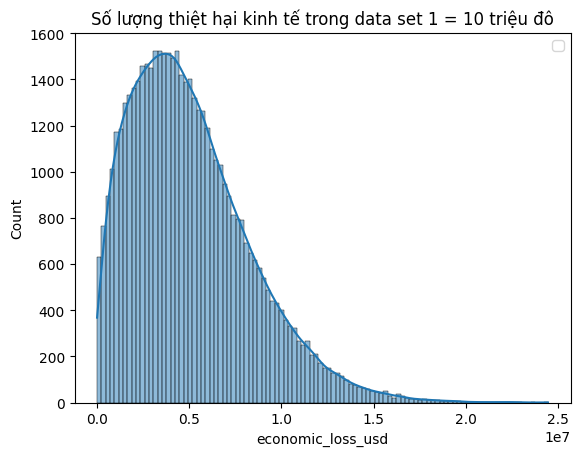

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title("Số lượng thiệt hại kinh tế trong data set 1 = 10 triệu đô")
sns.histplot(df["economic_loss_usd"], kde=True)
plt.legend()
plt.show()


In [10]:
df_low_economic_loss_usd = df[
    (df['economic_loss_usd'] < 2_585_513.48)
].copy()

print("Số dòng <25%:", df_low_economic_loss_usd.shape[0])

Số dòng <25%: 12500


In [11]:
df_high_economic_loss_usd = df[
    (df['economic_loss_usd'] > 6_950_614.61)
].copy()
print("Số dòng >75%:", df_high_economic_loss_usd.shape[0])

Số dòng >75%: 12500


In [12]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,5.02,100.59,5068593.45,12.18,250000.33,87.57,49.68,0.23,0.09
std,1.94,65.05,3268540.52,9.26,143227.51,10.19,20.10,34.76,98.38
min,1.00,0.00,527.39,1.00,16.60,29.75,2.00,-59.99,-170.00
25%,3.66,51.00,2585513.48,6.27,142966.34,83.06,36.00,-29.85,-85.55
50%,4.99,91.00,4548350.74,10.51,230536.47,89.18,49.00,0.27,0.39
75%,6.34,138.00,6950614.61,15.45,335225.93,94.70,63.00,30.49,85.67
max,10.00,524.00,24456237.87,63.10,1126465.23,100.00,112.00,60.00,170.00


In [13]:
df_low_economic_loss_usd.describe()

,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
count,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00
mean,3.60,72.31,1457972.16,19.00,180238.32,80.85,35.51,-0.00,0.04
std,1.92,54.96,707936.64,13.33,125866.46,14.06,19.88,34.83,98.21
min,1.00,0.00,527.39,1.00,16.60,29.75,2.00,-59.97,-170.00
25%,2.04,30.00,901583.92,9.60,82598.84,74.03,20.00,-30.24,-85.16
50%,3.35,59.00,1520492.31,15.48,152477.89,83.98,33.00,-0.01,-0.39
75%,4.88,101.00,2064083.19,24.58,246687.89,91.07,49.00,30.10,85.77
max,10.00,429.00,2585472.55,63.10,926210.05,100.00,109.00,59.99,169.99


In [14]:
df_high_economic_loss_usd.describe()

,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
count,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00
mean,6.63,134.18,9579612.48,7.87,329612.85,91.73,65.84,0.53,1.05
std,1.44,71.83,2335333.98,4.79,151271.04,6.27,15.24,34.70,97.71
min,2.85,0.00,6950726.82,1.00,124.89,64.19,19.00,-59.99,-170.00
25%,5.59,82.00,7815839.68,4.08,223964.26,87.33,55.00,-29.63,-82.43
50%,6.53,128.00,8940069.65,7.65,315461.54,92.27,65.00,1.08,2.79
75%,7.60,178.00,10689021.88,11.11,419191.93,96.99,76.00,30.52,85.55
max,10.00,524.00,24456237.87,26.07,1126465.23,100.00,112.00,59.99,169.94


In [15]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBRegressor


In [17]:
df = pd.read_csv("global_disaster_response_2018_2024.csv")


In [18]:
features = [
    "country",
    "disaster_type",
    "severity_index",
    "casualties",
    "response_time_hours",
    "aid_amount_usd",
    "response_efficiency_score",
    "recovery_days"
]

target = "economic_loss_usd"

df = df[features + [target]].dropna()


In [19]:
log_cols = ["casualties", "response_time_hours", "aid_amount_usd"]

for col in log_cols:
    df[col] = np.log1p(df[col])


In [20]:
X = df[features]
y = df[target]


In [21]:
cat_cols = ["country", "disaster_type"]
num_cols = [c for c in features if c not in cat_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)


In [22]:
xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42
)


In [23]:
pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", xgb_model)
    ]
)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['country', 'disaster_type']),
                                                 ('num', 'passthrough',
                                                  ['severity_index',
                                                   'casualties',
                                                   'response_time_hours',
                                                   'aid_amount_usd',
                                                   'response_efficiency_score',
                                                   'recovery_days'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsamp...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [25]:
y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)


RMSE: 2632503.870075171
R2 Score: 0.34774706460237537


In [26]:
sample_data = pd.DataFrame([{
    "country": "Philippines",
    "disaster_type": "Typhoon",
    "severity_index": 7,
    "casualties": 350,
    "response_time_hours": 10,
    "aid_amount_usd": 400000,
    "response_efficiency_score": 85,
    "recovery_days": 60
}])


In [27]:
for col in log_cols:
    sample_data[col] = np.log1p(sample_data[col])


In [29]:
predicted_loss = pipeline.predict(sample_data)

print("Dự đoán economic_loss_usd:", predicted_loss[0])


Dự đoán economic_loss_usd: 6376581.0
